In [14]:
from src.data_query.india_f1 import driver_comparisons
import matplotlib.pyplot as plt
import pandas as pd

data = driver_comparisons.get_driver_comparisons()
data_df = pd.DataFrame(data)

if data is None:
    print("Error in fetching data")
    
drivers_laps = {}
driver_pit_stops = {}

for index, row in data_df.iterrows():
    driver = row['forename']
    lap = row['lap_number']
    time_in_millis = row['timeinmillis']
    is_pitstop = row['is_pitstop']
    
    if driver not in drivers_laps:
        drivers_laps[driver] = []
        driver_pit_stops[driver] = []

    drivers_laps[driver].append((lap, time_in_millis))
    if is_pitstop:
        driver_pit_stops[driver].append(lap)

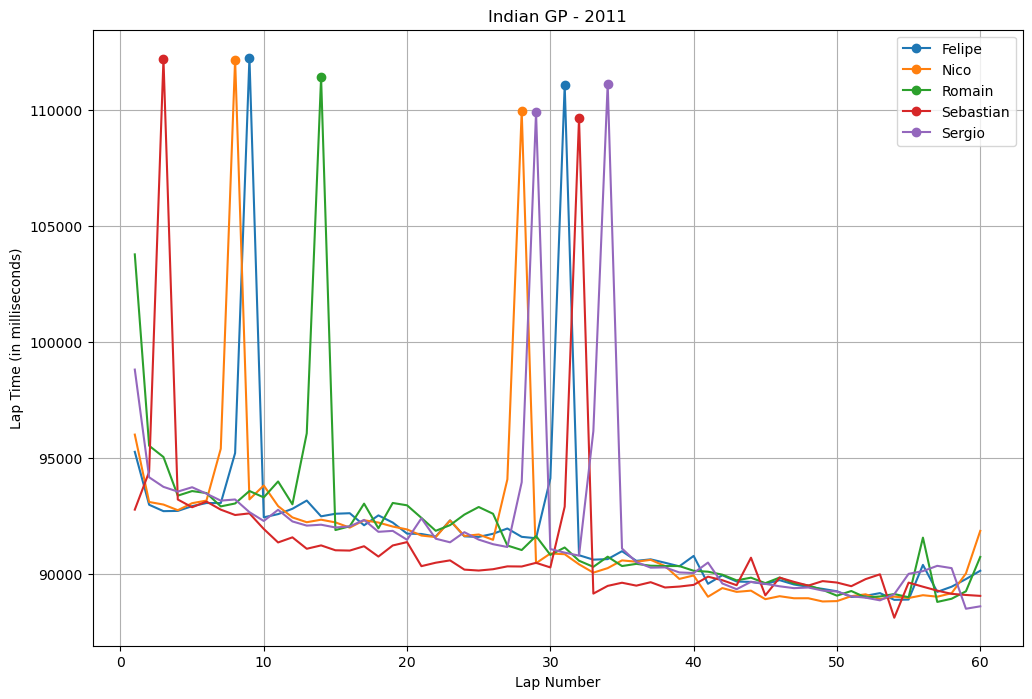

In [15]:
# Plot the data
plt.figure(figsize=(12, 8))

for idx, driver in enumerate(drivers_laps.keys()):
    laps, times = zip(*drivers_laps[driver])
    plt.plot(laps, 
             times, 
             # color=colors[idx], 
             label=driver, 
             marker='o', 
             markevery=driver_pit_stops[driver]
             )

plt.xlabel('Lap Number')
plt.ylabel('Lap Time (in milliseconds)')
plt.title('Indian GP - 2011')
plt.legend()
plt.grid(True)
plt.show()